In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/raw/train.csv')
df.sample(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2486,3532,9474-PHLYD,Female,0,No,No,15,Yes,No,DSL,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,59.45,892.65,Yes
524,5021,6617-WLBQC,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,...,No,No,No,No,One year,No,Credit card (automatic),81.85,1810.85,No
773,5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.4,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5634 non-null   int64  
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [4]:
(
    df
    .isna()
    .sum()
)

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
(
    df
    .duplicated()
    .sum()
)

0

In [6]:
import copy
new_df = copy.deepcopy(df.iloc[:, 1:])

In [7]:
new_df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
508,9537-JALFH,Male,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.9,1356.7,No
5543,7009-PCARS,Male,0,No,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.1,1001.5,No
3592,5192-EBGOV,Female,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.7,85.7,Yes


In [8]:
new_df = new_df.rename(columns = str.lower)
new_df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

# univariate analysis

In [9]:
def univariate_analysis(df, col, x = None, stat = 'percent'):

    cnt =  df[col].value_counts()

    if x is None:
        ax = sns.countplot(data = df, x = col, color = 'purple', stat = stat)
    else:
        ax = sns.countplot(data = df, y = col, color = 'purple', stat = stat)
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=45) 
    return plt.show()

#### Gender

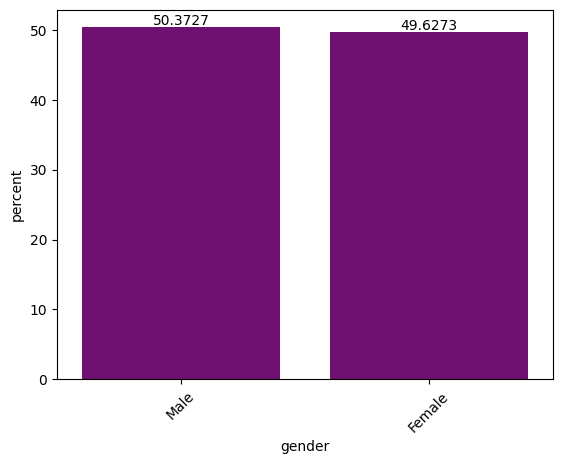

In [10]:
univariate_analysis(new_df, 'gender')

* Both the classes, `Female and male are almost equal`

#### senior citizen

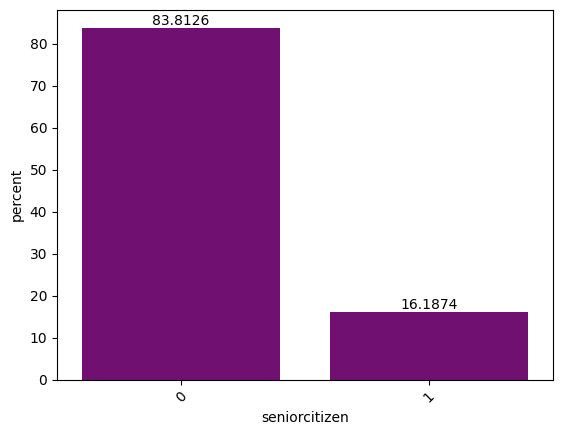

In [11]:
univariate_analysis(new_df, 'seniorcitizen')

In [12]:
new_df[new_df['seniorcitizen'] == 1].sample(3)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5378,4902-OHLSK,Female,1,No,No,29,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,98.65,2862.75,Yes
4998,6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No
1798,5020-ZSTTY,Female,1,No,No,54,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),82.45,4350.1,Yes


* We have 83% data points with people not categorized as senior citizen
* its relationship with churn will be interesting

#### partner

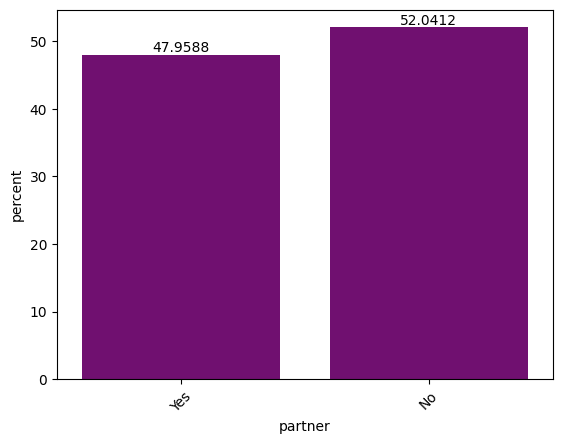

In [13]:
univariate_analysis(new_df, 'partner')

* Partner's column categories are almost the same

#### dependents

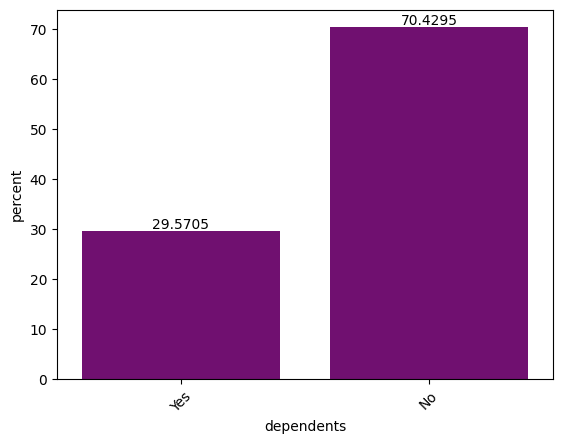

In [14]:
univariate_analysis(new_df, 'dependents')

* We have 70% data points with people with no dependents

#### tenure

In [15]:
tenure_0_20 = new_df[new_df['tenure'].between(0, 20)]

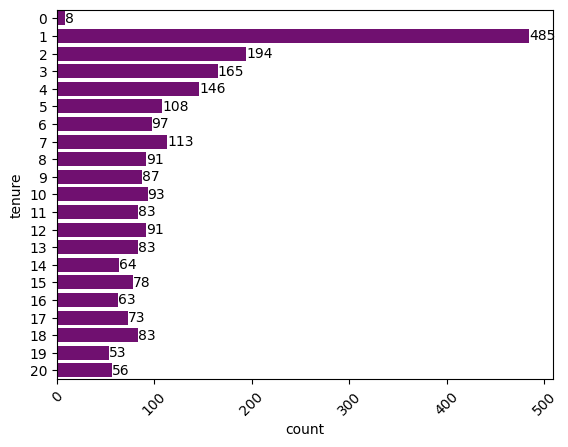

In [16]:
univariate_analysis(tenure_0_20, 'tenure', 1, 'count')

In [18]:
tenure_21_50 = new_df[new_df['tenure'].between(21, 50)]

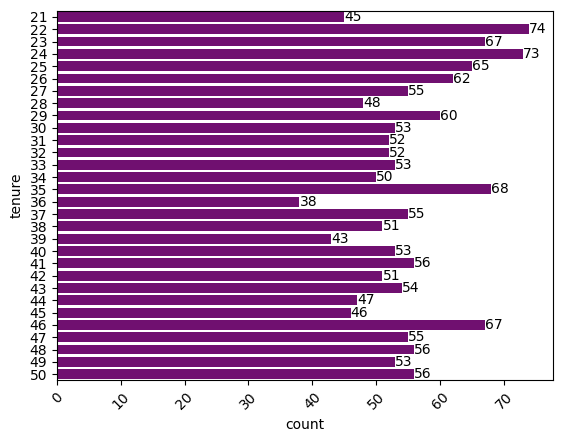

In [19]:
univariate_analysis(tenure_21_50, 'tenure', 1, 'count')

In [20]:
tenure_51_72 = new_df[new_df['tenure'].between(51, 72)]

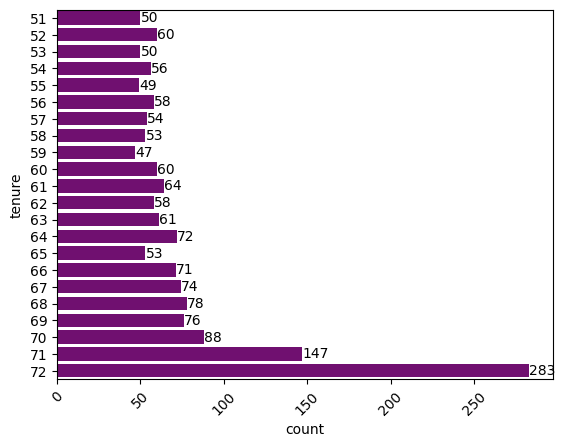

In [21]:
univariate_analysis(tenure_51_72, 'tenure', 1, 'count')

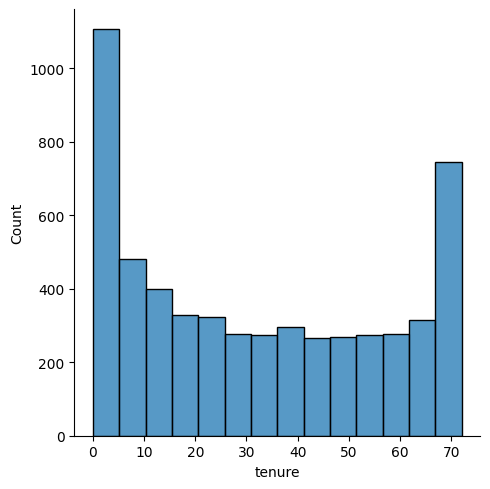

In [22]:
sns.displot(data = df, x = 'tenure')

In [23]:
(
    new_df['tenure']
    .value_counts()
    .reset_index()
    .query("count >= 100")
)

,tenure,count
0,1,485
1,72,283
2,2,194
3,3,165
4,71,147
5,4,146
6,7,113
7,5,108


* Tenure column has a very unbalanced distribution
* Need to find a way to deal with it

#### phone service

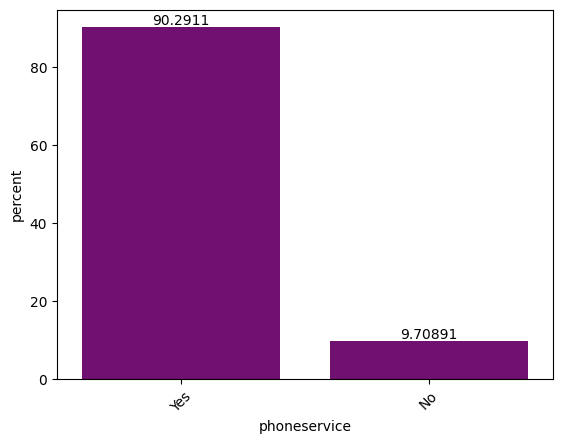

In [24]:
univariate_analysis(new_df, 'phoneservice')

* phone service column is very unbalanced with `90% points` belonging to `yes` category

#### multiple lines

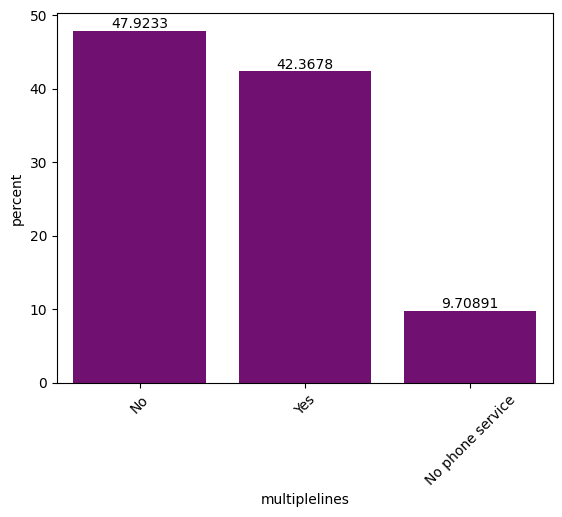

In [25]:
univariate_analysis(new_df, 'multiplelines')

* multiple lines column has 3 categories, with `no and yes` with almost similar distribution.
* other `no phone service` is very less

#### internet service

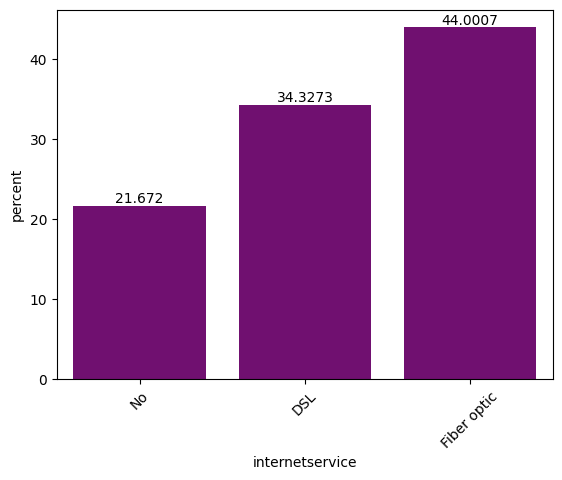

In [26]:
univariate_analysis(new_df, 'internetservice')

* internet service column has 3 categories, with `DSL and Fibre optic` with kind of similar distribution.
* other `no` is very less

#### online security

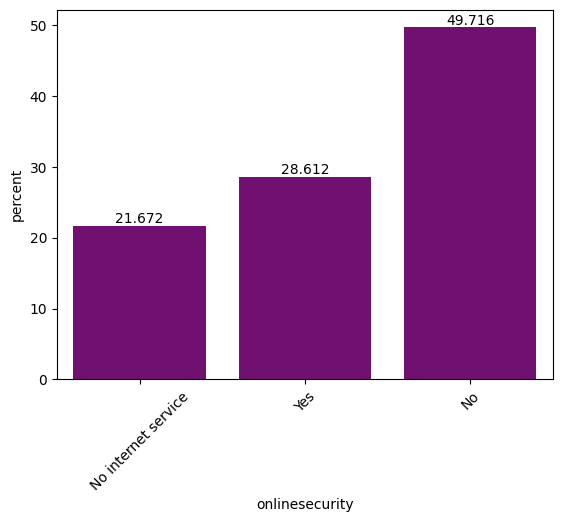

In [27]:
univariate_analysis(new_df, 'onlinesecurity')

* online security column has 3 categories, with `No internet service and yes` with kind of similar distribution.
* other `no` is very large in number, almost `50%`

#### online backup

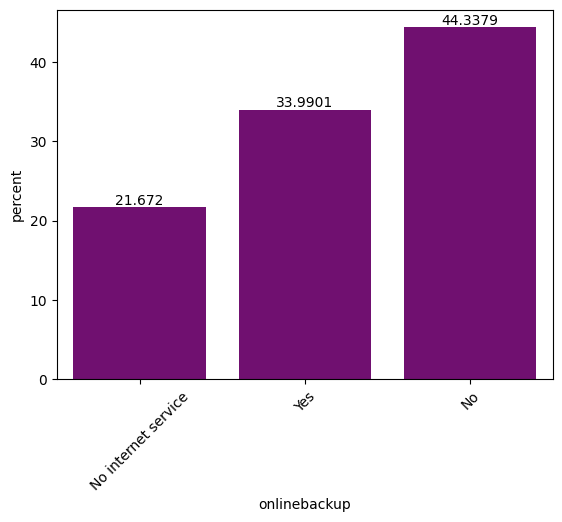

In [28]:
univariate_analysis(new_df, 'onlinebackup')

* online backup column has 3 categories, with `no and yes` with kind of similar distribution.
* other `No internet service` is low in number.

#### device protection

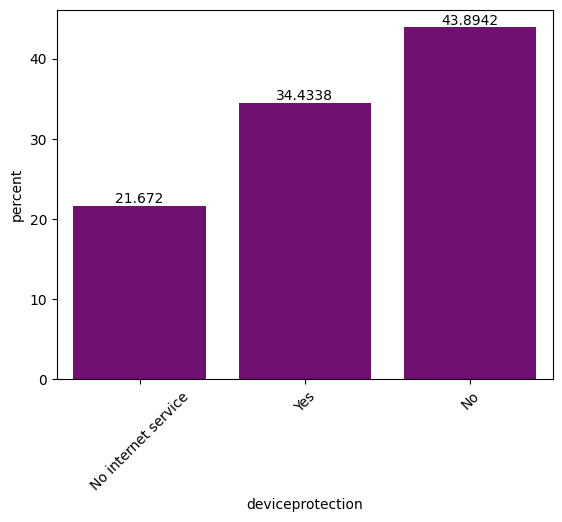

In [29]:
univariate_analysis(new_df, 'deviceprotection')

* device protection column has 3 categories, with `no and yes` with kind of similar distribution.
* other `No internet service` is low in number.

#### tech support

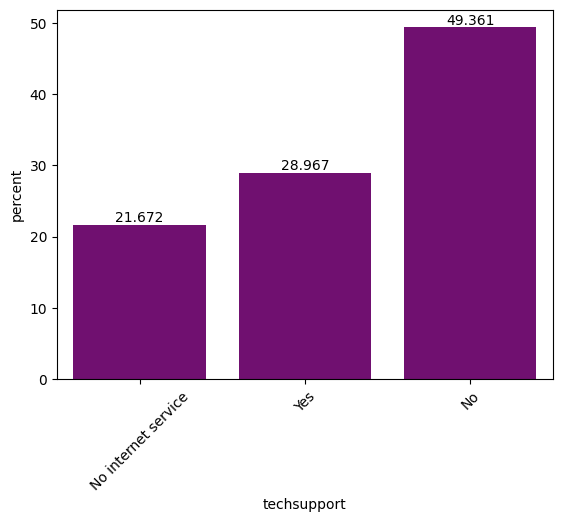

In [30]:
univariate_analysis(new_df, 'techsupport')

* device protection column has 3 categories, with `no internet service and yes` with kind of similar distribution.
* other `No` is high in number.

#### streaming tv

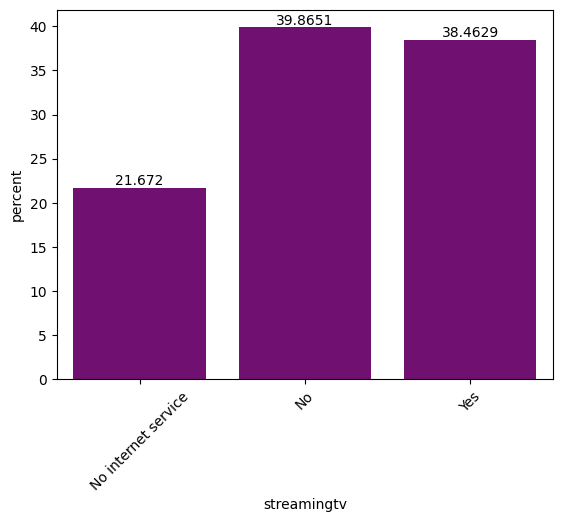

In [31]:
univariate_analysis(new_df, 'streamingtv')

#### streaming movies

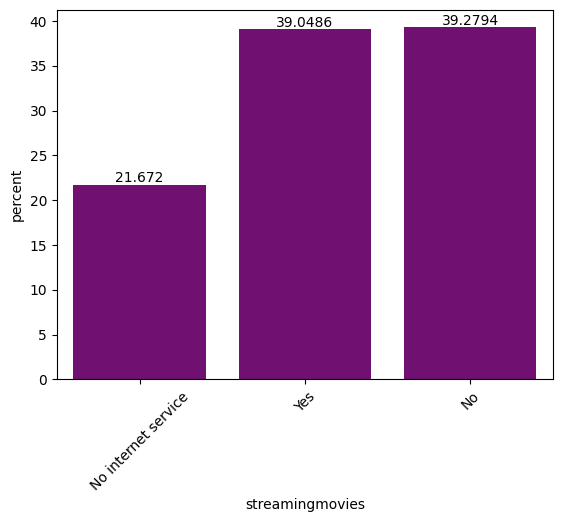

In [32]:
univariate_analysis(new_df, 'streamingmovies')

#### contract

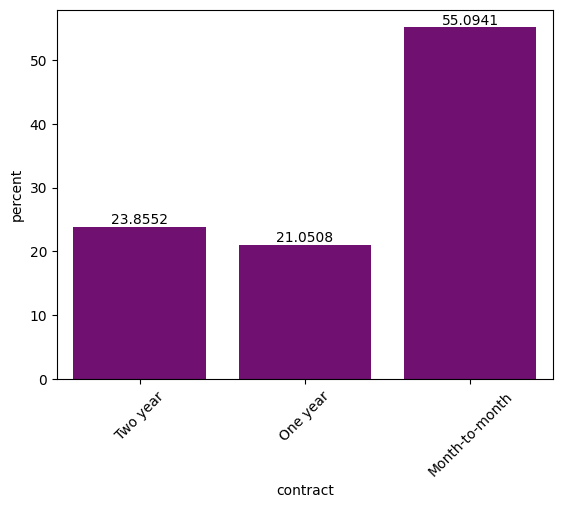

In [33]:
univariate_analysis(new_df, 'contract')

#### paperless billing

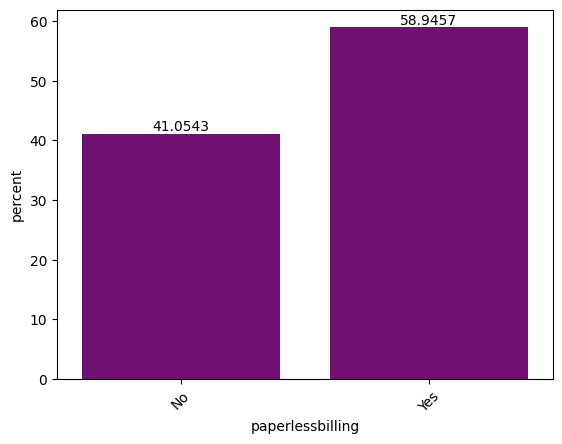

In [34]:
univariate_analysis(new_df, 'paperlessbilling')

#### payment method

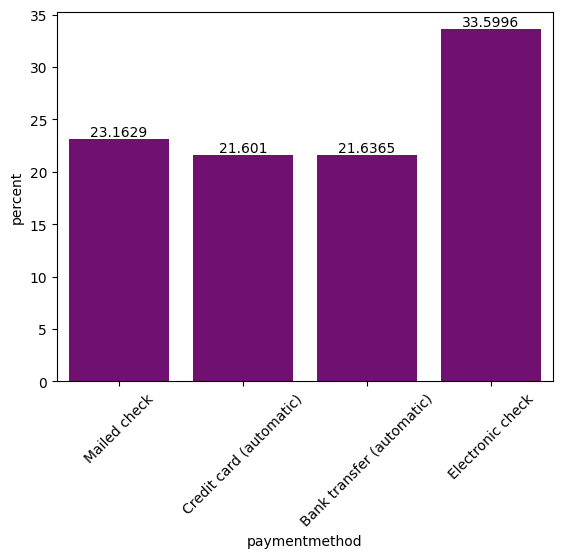

In [35]:
univariate_analysis(new_df, 'paymentmethod')

#### monthly charges

<Axes: xlabel='monthlycharges', ylabel='Density'>

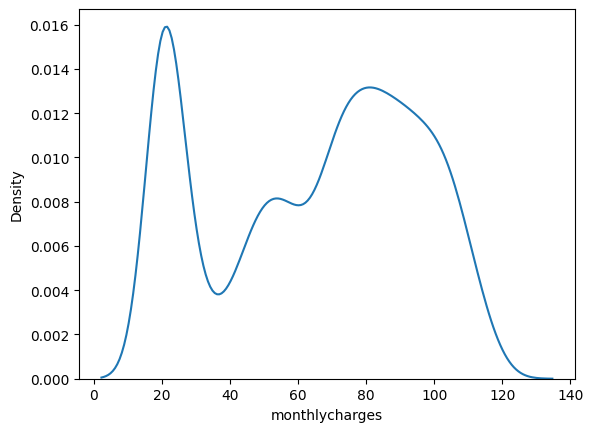

In [40]:
sns.kdeplot(data = new_df, x = 'monthlycharges')

#### total charges

In [45]:
new_df.monthlycharges.value_counts()

monthlycharges
20.05     46
19.90     39
20.00     36
20.15     35
19.65     34
          ..
77.30      1
52.85      1
113.20     1
38.10      1
68.25      1
Name: count, Length: 1494, dtype: int64

In [47]:
new_df.totalcharges.dtypes

dtype('O')

* Why is it object, is there any missing value or non-numeric point

In [67]:
new_df['totalcharges'] = pd.to_numeric(new_df['totalcharges'], errors = 'coerce')

In [70]:
new_df[new_df['totalcharges'].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
899,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2224,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
2697,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
3054,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3488,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
4056,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
4761,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
5607,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No


<Axes: xlabel='totalcharges', ylabel='Density'>

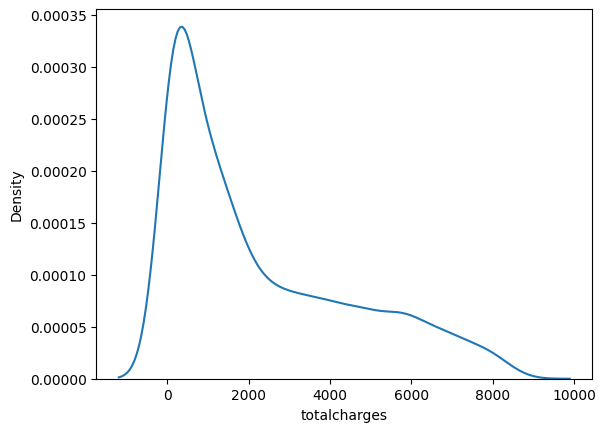

In [68]:
sns.kdeplot(data = new_df, x = 'totalcharges')

#### churn

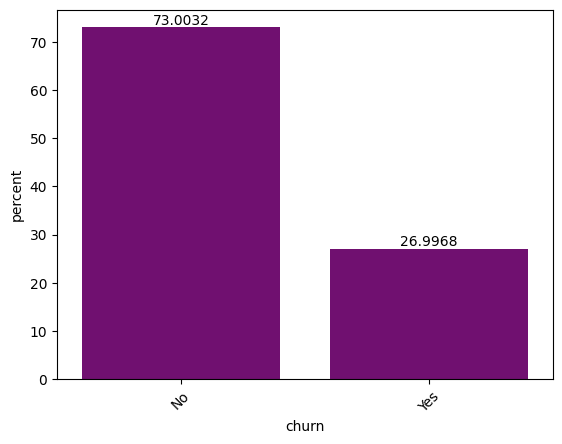

In [71]:
univariate_analysis(new_df, 'churn')

#### churn column is imbalanced so will have to be careful here.